In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

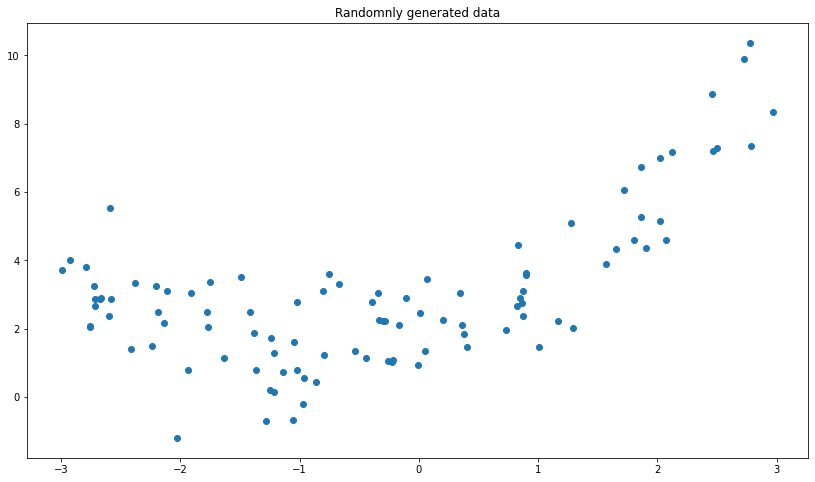

In [2]:
m=100
X = 6*np.random.rand(m,1) - 3
Y = 0.5 * X**2 +X + 2 + np.random.randn(m,1)

plt.figure(figsize=(14,8))
plt.scatter(X,Y)
plt.title('Randomnly generated data')
plt.show()

In [3]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size=0.2,random_state=0)

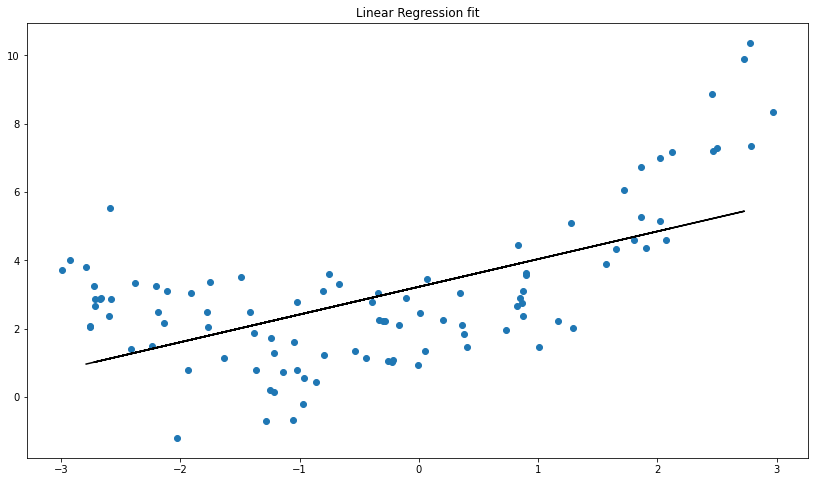

In [4]:
# first we will try to fit a linear regression line into the data
lm1 = LinearRegression()
lm1.fit(xTrain,yTrain)
lm1_preds = lm1.predict(xTest)

plt.figure(figsize=(14,8))
plt.scatter(X,Y)
plt.plot(xTest,lm1_preds,color='black')
plt.title('Linear Regression fit')
plt.show()

#### What we notice is that a linear fit is not suitable for this kind of data. It is missing a lot of points and it will mis-predict. Hence we will try to apply a polynomial fit to this data.

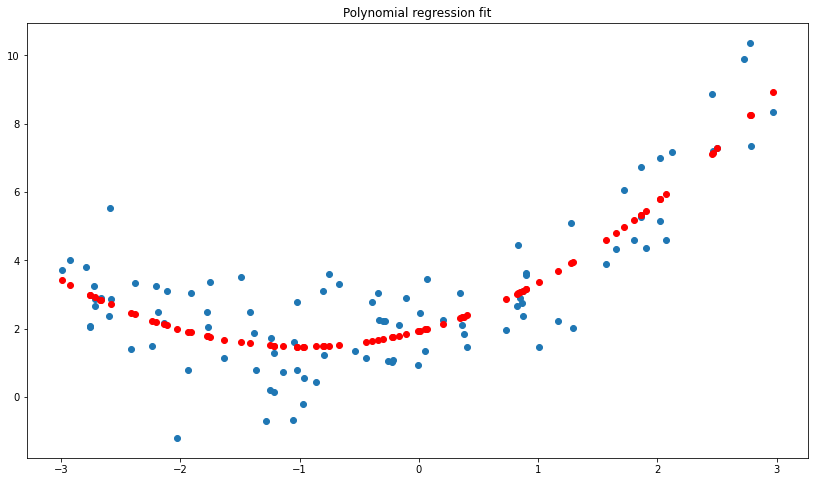

In [5]:
poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(xTrain)
X_poly_test = poly_reg.fit_transform(xTest)

poly = LinearRegression()
poly.fit(X_poly_train,yTrain) # fitting the polynomial feature dataset
poly_preds = poly.predict(X_poly_test)

plt.figure(figsize=(14,8))
plt.scatter(X, Y)
plt.scatter(xTrain, poly.predict(X_poly_train), c='r',linestyle='-')
plt.title('Polynomial regression fit')
plt.show()


In [6]:
print('R-square for linear fit :',r2_score(yTest,lm1_preds))
print('R-square for polynomial fit :',r2_score(yTest,poly_preds))

R-square for linear fit : 0.20181017618366892
R-square for polynomial fit : 0.7857600482070928


#### As we can see the $R^2$ value for the polynomial fit is much higher than the linear one. Hence our choice for the polynomial regression has proved correct 